In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
np.random.seed(42)

mu1 = 0
mu2 = 5
mu3 = -3

sigma1 = 1
sigma2 = 4
sigma3 = 2.25

In [138]:
pi = [1/3, 1/3, 1/3]
mus = [1, 2, 1]
vars = [1, 0.1, 3]

In [139]:
def norm_density(x, mu, var):
    return (1/np.sqrt(2*np.pi*var))*np.exp(-0.5*(x-mu)**2/var)

def density(x, pi, z, mu, vars):
    for i in range(len(z)):
        if z[i] == 1:
            return pi[i]*norm_density(mu[i], vars[i], x)
    raise Exception

def likelihood(X, z, pi, mu, vars):
    k = z.find(1)
    result = 0.0
    for i in range(len(X)):
        result += np.log2(pi[k]) + np.log2(norm_density(X[i], mu[k], vars[k]))

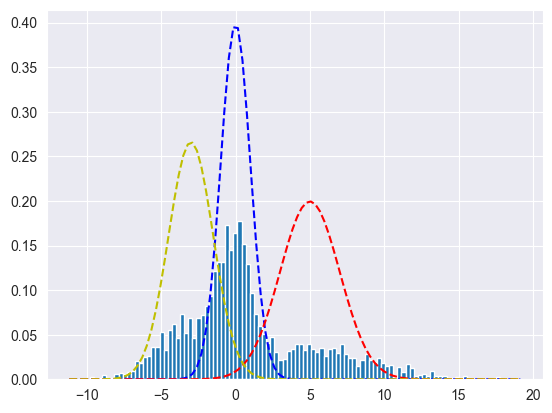

In [140]:
data1 = np.random.normal(mu1, sigma1, 1000)
data2 = np.random.normal(mu2, sigma2, 1000)
data3 = np.random.normal(mu3, sigma3, 1000)

data = np.concatenate((data1, data2, data3))
plt.hist(data, bins=100, density=True)

x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)

pdf1 = (1/np.sqrt(2*np.pi*sigma1))*np.exp(-0.5*(x-mu1)**2/sigma1)
pdf2 = (1/np.sqrt(2*np.pi*sigma2))*np.exp(-0.5*(x-mu2)**2/sigma2)
pdf3 = (1/np.sqrt(2*np.pi*sigma3))*np.exp(-0.5*(x-mu3)**2/sigma3)

plt.plot(x, pdf1, color='b', linestyle='--')
plt.plot(x, pdf2, color='r', linestyle='--')
plt.plot(x, pdf3, color='y', linestyle='--')

plt.show()

In [141]:
z = np.zeros((len(data), 3))

for _ in range(1000):
    # E-шаг:
    for k in range(3):
        z[:, k] = pi[k] * norm_density(data, mus[k], vars[k])
    #   фактически это g_k из лекции Соколова
    z = z / z.sum(axis=1, keepdims=True)

    # M-шаг:
    Nk = z.sum(axis=0)
    mus = np.sum(data[:, None] * z, axis=0) / Nk
    vars = np.sum(z * (data[:, None] - mus)**2, axis=0) / Nk
    pi = Nk / len(data)

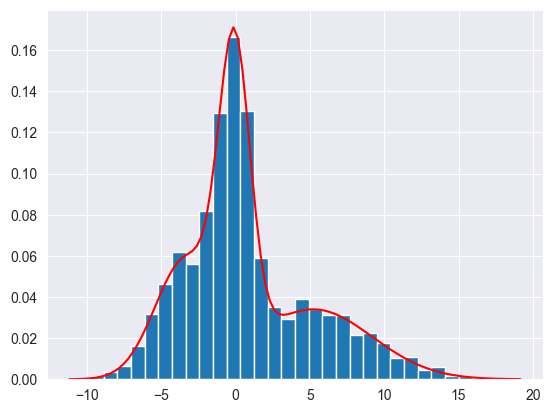

In [142]:
plt.hist(data, bins=30, density=True)
x = np.linspace(x_min, x_max, 100)
pdf = pi[0] * norm_density(x, mus[0], vars[0]) + \
      pi[1] * norm_density(x, mus[1], vars[1]) + \
      pi[2] * norm_density(x, mus[2], vars[2])
plt.plot(x, pdf, color='r')

plt.show()